In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dropout
from tensorflow import losses, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.models import *
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import os
import json
import cv2
from numpy import asarray
%matplotlib inline

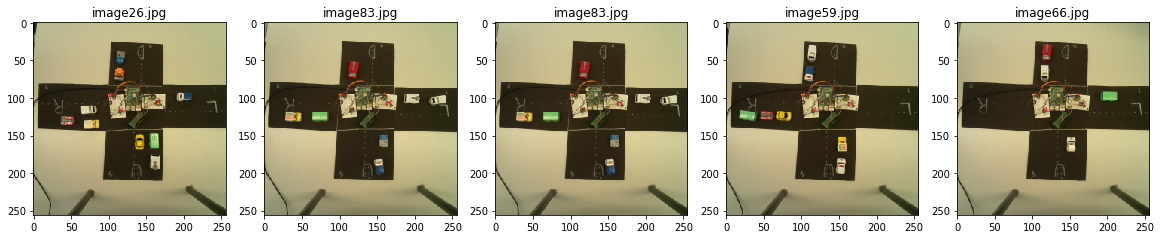

In [2]:
plt.figure(figsize=(20,20))
img_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Train'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [7]:
IMG_WIDTH=160
IMG_HEIGHT=160
#img_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Train'
#test_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Test'
test_folder = r'C:\\Users\\Dhruba\\IoTProject\\IoT\\images'

In [2]:
def create_dataset(img_folder):
   
    img_data_array=[]
   
    for file in os.listdir(os.path.join(img_folder)):

        image_path= os.path.join(img_folder,  file)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
    return img_data_array

(95, 160, 160, 3)

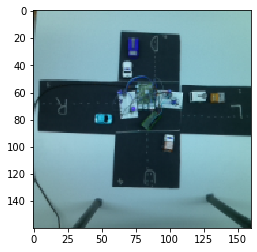

In [6]:
# extract the image array and class name
img_data = create_dataset(img_folder)
X_train = np.array(img_data)
plt.imshow(X_train[94])
X_train.shape

In [7]:
y_train = np.array([[0, 0, 0, 0], [2, 1, 0, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1], [1, 0, 1, 1], [1, 1, 2, 1], #6
                    [1, 2, 1, 1], [2, 1, 1, 1], [1, 1, 1, 2], [2, 1, 1, 2], [2, 1, 2, 1], [2, 2, 1, 1], [2, 2, 1, 1], #13
                    [2, 2, 2, 1], [2, 2, 2, 2], [3, 2, 2, 2], [2, 3, 2, 2], [2, 2, 3, 2], [1, 2, 3, 3], [1, 3, 3, 3], #20
                    [3, 3, 3, 3], [3, 0, 3, 3], [2, 2, 2, 2], [0, 0, 2, 3], [2, 1, 2, 2], [2, 1, 0, 0], [2, 3, 1, 0], #27
                    [0, 3, 0, 1], [1, 3, 2, 2], [2, 0, 1, 2], [3, 1, 1, 2], [1, 1, 2, 2], [1, 1, 2, 3], [1, 3, 1, 1], #34                   
                    [0, 3, 0, 0], [3, 0, 0, 0], [1, 0, 0, 2], [0, 0, 1, 2], [0, 0, 2, 3], [2, 2, 2, 0], [2, 3, 2, 1], #41                   
                    [2, 2, 2, 2], [1, 2, 0, 1], [0, 2, 2, 0], [1, 1, 2, 0], [1, 1, 2, 0], [2, 1, 2, 1], [0, 1, 0, 2], #48  
                    [1, 2, 1, 0], [1, 0, 2, 2], [0, 3, 2, 2], [0, 2, 3, 2], [1, 0, 0, 0], [3, 1, 3, 0], [0, 1, 3, 0], #55
                    [2, 1, 1, 1], [2, 1, 0, 1], [0, 1, 0, 1], [1, 1, 0, 0], [1, 2, 0, 1], [2, 1, 0, 2], [1, 1, 1, 1], #62 
                    [2, 0, 0, 2], [0, 1, 0, 0], [2, 0, 2, 0], [3, 0, 3, 0], [2, 2, 1, 1], [2, 1, 1, 1], [1, 0, 1, 1], #69                    
                    [2, 3, 0, 0], [1, 3, 0, 0], [1, 0, 2, 1], [0, 0, 3, 0], [0, 0, 0, 3], [0, 3, 0, 1], [1, 1, 2, 2], #76
                    [2, 1, 2, 2], [1, 2, 2, 2], [0, 2, 0, 2], [3, 2, 0, 1], [3, 2, 2, 1], [1, 2, 2, 0], [2, 2, 2, 0], #83
                    [0, 0, 0, 1], [2, 2, 1, 2], [2, 1, 0, 3], [1, 0, 1, 2], [1, 2, 0, 1], [1, 0, 1, 2], [2, 2, 0, 1], #90
                    [2, 0, 3, 2], [3, 1, 1, 3], [3, 3, 1, 3], [2, 2, 1, 1]]) #94

y_train.shape

(95, 4)

In [4]:
img_data = create_dataset(test_folder)
X_test = np.array(img_data)

In [37]:
## Our Deep Neural Network ##
def CstmNet(input_shape=(160, 160, 3)):

    X1_input = Input(input_shape)
    
############ First input branch ######################

    X1 = Conv2D(32, 6, strides=1, padding="same")(X1_input)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(6, strides=3)(X1)     
    

    X1 = Conv2D(32, 3, strides=1, padding="same")(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(4, strides=2)(X1)    
      
    X1 = Conv2D(32, 3, strides=1, padding="same")(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(4, strides=2)(X1)    
        

    #X = AveragePooling2D()(X1)
    X = Flatten()(X1)
    
############ Final Layer ######################
    
    X = Dense(128, activation='relu')(X)
    output = Dense(4)(X) 
    model = Model(inputs=X1_input, outputs=output, name='CstmNet_DDD')
    
    return model

model = CstmNet(input_shape=(160, 160, 3))
model.summary()

Model: "CstmNet_DDD"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 160, 160, 32)      3488      
_________________________________________________________________
batch_normalization_12 (Batc (None, 160, 160, 32)      128       
_________________________________________________________________
activation_12 (Activation)   (None, 160, 160, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 52, 52, 32)        

In [41]:
##fit the model on all data

LR = 0.0001
optim = optimizers.Adam(learning_rate=LR)

model.compile(optimizer=optim, loss = 'mae', metrics=['accuracy'])

filepath = 'traffic.ep{epoch:02d}-acc{accuracy:.3f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=False,
                             mode='max')
callbacks = [checkpoint]

result = model.fit(x=X_train,
                    y=y_train,
                    batch_size = 20,
                    epochs = 30,
                    verbose=1,
                    #validation_data=(X_test, y_test),
                    callbacks=callbacks,
                    shuffle=True)

Epoch 1/30
5/5 [==============================] - 3s 446ms/step - loss: 0.4681 - accuracy: 0.6947

Epoch 00001: saving model to traffic.ep01-acc0.695.hdf5
Epoch 2/30
5/5 [==============================] - 2s 450ms/step - loss: 0.3959 - accuracy: 0.7368

Epoch 00002: saving model to traffic.ep02-acc0.737.hdf5
Epoch 3/30
5/5 [==============================] - 2s 434ms/step - loss: 0.2495 - accuracy: 0.7474

Epoch 00003: saving model to traffic.ep03-acc0.747.hdf5
Epoch 4/30
5/5 [==============================] - 2s 451ms/step - loss: 0.1395 - accuracy: 0.7684

Epoch 00004: saving model to traffic.ep04-acc0.768.hdf5
Epoch 5/30
5/5 [==============================] - 2s 447ms/step - loss: 0.1228 - accuracy: 0.7579

Epoch 00005: saving model to traffic.ep05-acc0.758.hdf5
Epoch 6/30
5/5 [==============================] - 2s 448ms/step - loss: 0.1076 - accuracy: 0.7368

Epoch 00006: saving model to traffic.ep06-acc0.737.hdf5
Epoch 7/30
5/5 [==============================] - 2s 436ms/step - loss

In [3]:
best_model = load_model('traffic.ep28-acc0.853.hdf5', compile = False)

In [6]:
y_pred = best_model.predict(X_test)

In [7]:
y_pred

array([[1.5590479 , 1.2748684 , 1.2362571 , 0.8554546 ],
       [2.8301497 , 1.2154506 , 2.0434272 , 2.8434076 ],
       [0.83074325, 1.4292942 , 1.4362767 , 0.88593894],
       [0.12385236, 0.29875672, 1.2172637 , 0.20008631],
       [3.059017  , 0.17866378, 0.04283959, 0.11448748]], dtype=float32)

In [8]:
y = np.round(y_pred)
y

array([[2., 1., 1., 1.],
       [3., 1., 2., 3.],
       [1., 1., 1., 1.],
       [0., 0., 1., 0.],
       [3., 0., 0., 0.]], dtype=float32)

[2. 1. 1. 1.]


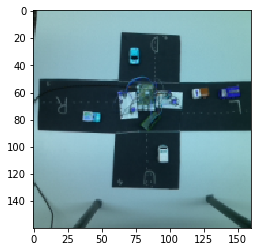

In [13]:
test_case = 0
plt.imshow(X_test[test_case])
y_pred1 = np.round(y_pred[test_case])
print(y_pred1)

In [14]:
import time
def periodic_work(interval):
    while True:
        #change this to the function you want to call, or paste in the code you want to run
        img_data = create_dataset(test_folder)
        X_test = np.array(img_data)
        y_pred = best_model.predict(X_test)
        y_pred = np.round(y_pred)
        # Data to be written
        a = np.round(y_pred[0][0])
        b = np.round(y_pred[0][1])
        c = np.round(y_pred[0][2])
        d = np.round(y_pred[0][3])
        vehicles = [a,b,c,d] 

        trafficTime = [] 

        for cars in vehicles: 
            trafficTime.append(4+(cars*3)) 

        #for timePerWay in trafficTime:
            #print(timePerWay)

        dictionary = {
            "numCarsOne": str(a), 
            "numCarsTwo": str(b),
            "numCarsThree": str(c),
            "numCarsFour": str(d),

            "lightOneInterval": str(trafficTime[0]),
            "lightTwoInterval": str(trafficTime[1]),
            "lightThreeInterval": str(trafficTime[2]),
            "lightFourInterval": str(trafficTime[3])
        }

        with open("trafic_light_update.json", "w") as outfile:
            json.dump(dictionary, outfile)
        print(y_pred)
        plt.imshow(X_test[0])
        #interval should be an integer, the number of seconds to wait
        time.sleep(interval)

[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[2. 2. 2. 1.]]
[[1. 2. 2. 1.]]
[[2. 2. 2. 1.]]


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


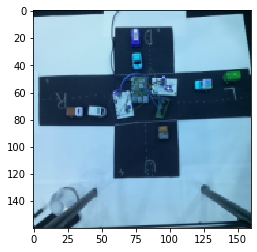

In [65]:
periodic_work(10) #10 seconds interval